In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"Tugas/scrapped_data_FF.csv")

df

,userName,score,at,content
0,Phyta Rayhn,1,2023-06-21 20:28:07,Tolong game di ringan kan lagi karena kasihan ...
1,Komang Edirestawan,2,2023-06-21 20:24:05,"membaca info game aja terus ,,padahal sinyal b..."
2,Sofyan Uchup,2,2023-06-21 20:11:17,Setelah di update sinyal kok gak stabil sih .....
3,Nasywan Farrel,5,2023-06-21 20:06:35,Update terus Semua bug ndak di urus Jaringanny...
4,Baim Aja,1,2023-06-21 20:04:48,Gada guna updet terus kita kalo main CSR dapet...
...,...,...,...,...
4995,gusto temaluru,1,2023-01-11 17:32:08,Tolong di perbaiki lagi tentang bug di luar zo...
4996,ANM Gmg,5,2023-01-11 17:15:47,Untuk pihak Garena Free Fire Indonesia...Tolon...
4997,Adam,5,2023-01-11 17:07:45,Jangan terlalu ada banyak alasan masalah pada ...
4998,Ferry Martua Sitorus,4,2023-01-11 16:00:23,Saya mau kasih tahu buat garena free fire. Upd...


In [3]:
df["at"] = pd.to_datetime(df["at"])
df["Bulan"] = df["at"].dt.month

df = df[["userName","content","Bulan","score"]]

df

,userName,content,Bulan,score
0,Phyta Rayhn,Tolong game di ringan kan lagi karena kasihan ...,6,1
1,Komang Edirestawan,"membaca info game aja terus ,,padahal sinyal b...",6,2
2,Sofyan Uchup,Setelah di update sinyal kok gak stabil sih .....,6,2
3,Nasywan Farrel,Update terus Semua bug ndak di urus Jaringanny...,6,5
4,Baim Aja,Gada guna updet terus kita kalo main CSR dapet...,6,1
...,...,...,...,...
4995,gusto temaluru,Tolong di perbaiki lagi tentang bug di luar zo...,1,1
4996,ANM Gmg,Untuk pihak Garena Free Fire Indonesia...Tolon...,1,5
4997,Adam,Jangan terlalu ada banyak alasan masalah pada ...,1,5
4998,Ferry Martua Sitorus,Saya mau kasih tahu buat garena free fire. Upd...,1,4


## EDA kolom content

In [4]:
import re
def remove_repeated_punctuation(text):
    pattern = r'([^\w\s])\1+'
    clean_text = re.sub(pattern, r'\1', text)
    return clean_text

def cleaning_text(text):
    # hapus tab, newline, dan backslash
    tab = text.replace('\t', ' ').replace('\n', ' ').replace('\\', ' ')
    # hapus underscore
    score = tab.replace('_', '')
    # hapus user mention
    user = re.sub('@[A-Za-z0-9]+', '', score)
    # menghapus angka
    no = re.sub('[0-9]+', '', user)
    # menghapus slang
    slang = re.sub(r'\\n', ' ', no)
    # menghapus regex
    reg = re.sub("b'", ' ', slang)
    # menghapus emoticon
    cleaned_text = re.sub(r'[^\w\s,]', '', reg)
    cleaned_text = cleaned_text.strip()
    # Menghapus tanda baca berulang
    cleaned_text = remove_repeated_punctuation(cleaned_text)
    
    return cleaned_text

In [5]:
df = df.assign(cleaned_text=df["content"].apply(cleaning_text))

del df["content"]
df

,userName,Bulan,score,cleaned_text
0,Phyta Rayhn,6,1,Tolong game di ringan kan lagi karena kasihan ...
1,Komang Edirestawan,6,2,"membaca info game aja terus ,padahal sinyal ba..."
2,Sofyan Uchup,6,2,Setelah di update sinyal kok gak stabil sih T...
3,Nasywan Farrel,6,5,Update terus Semua bug ndak di urus Jaringanny...
4,Baim Aja,6,1,Gada guna updet terus kita kalo main CSR dapet...
...,...,...,...,...
4995,gusto temaluru,1,1,Tolong di perbaiki lagi tentang bug di luar zo...
4996,ANM Gmg,1,5,Untuk pihak Garena Free Fire IndonesiaTolong P...
4997,Adam,1,5,Jangan terlalu ada banyak alasan masalah pada ...
4998,Ferry Martua Sitorus,1,4,Saya mau kasih tahu buat garena free fire Upda...


In [6]:
def lowercase():
    lower_word = df['cleaned_text'].str.lower()
    return lower_word

lower_text= lowercase()

print(lower_text)

0       tolong game di ringan kan lagi karena kasihan ...
1       membaca info game aja terus ,padahal sinyal ba...
2       setelah di update sinyal kok gak stabil sih  t...
3       update terus semua bug ndak di urus jaringanny...
4       gada guna updet terus kita kalo main csr dapet...
                              ...                        
4995    tolong di perbaiki lagi tentang bug di luar zo...
4996    untuk pihak garena free fire indonesiatolong p...
4997    jangan terlalu ada banyak alasan masalah pada ...
4998    saya mau kasih tahu buat garena free fire upda...
4999    akhir akhir ini saya sering merasa masalah mac...
Name: cleaned_text, Length: 5000, dtype: object


In [7]:
import nltk
from nltk.corpus import stopwords
import pandas as pd

# Mengambil kolom komentar
komentar = lower_text

# Mendapatkan stopwords bawaan dari NLTK
default_stopwords = set(stopwords.words('indonesian'))

# Membuat set stopwords baru dengan menghapus "tidak" dari stopwords bawaan
custom_stopwords = default_stopwords - {'tidak', 'melihat', 'berikan','memberi', 'tidaklah'}

# Membuat set stopwords baru dengan menggabungkan stopwords bawaan dan custom stopwords
stopwords_set = default_stopwords.union(custom_stopwords)

# Mengumpulkan daftar stop words dari ketiga dataset
for comment in komentar:
    words = comment.split()
    stopwords = [word for word in words if word.lower() in stopwords_set]
    stopwords_set.update(stopwords)

print(stopwords_set)


{'bagi', 'antar', 'pukul', 'sendirinya', 'misalkan', 'betul', 'mengungkapkan', 'diantaranya', 'masihkah', 'nyaris', 'berkehendak', 'bisakah', 'tidakkah', 'akhiri', 'katakanlah', 'kepadanya', 'demikianlah', 'tak', 'sebagai', 'kira', 'dijawab', 'memungkinkan', 'terus', 'pertama-tama', 'semata-mata', 'sesampai', 'mengatakan', 'sangat', 'berikan', 'ditambahkan', 'dibuatnya', 'padahal', 'inginkah', 'menyeluruh', 'panjang', 'guna', 'agak', 'semaunya', 'nantinya', 'mengingatkan', 'sepihak', 'didatangkan', 'sekiranya', 'baru', 'lah', 'dituturkannya', 'berlangsung', 'sekali', 'terjadilah', 'terbanyak', 'beginikah', 'hendaklah', 'mulai', 'berkali-kali', 'itu', 'dipertanyakan', 'sekecil', 'menanyai', 'mereka', 'jawab', 'rupanya', 'berikut', 'memperkirakan', 'dimisalkan', 'kapanpun', 'inikah', 'lebih', 'oleh', 'setiba', 'saya', 'pula', 'gunakan', 'apa', 'begini', 'tahun', 'tampak', 'menggunakan', 'pun', 'sebagaimana', 'perlu', 'mengapa', 'rasa', 'usah', 'diingatkan', 'dimintai', 'pada', 'cukuplah'

In [8]:
def removeStopWords(text):
    clean_word_list = [word for word in text.split() if word not in stopwords]
    return clean_word_list

stopwords_text= lower_text.apply(removeStopWords)

print(stopwords_text)

0       [tolong, game, ringan, kan, lagi, karena, kasi...
1       [membaca, info, game, aja, terus, ,padahal, si...
2       [setelah, update, sinyal, kok, gak, stabil, si...
3       [update, terus, bug, ndak, urus, jaringannya, ...
4       [gada, guna, updet, terus, kita, kalo, main, c...
                              ...                        
4995    [tolong, perbaiki, lagi, tentang, bug, luar, z...
4996    [untuk, pihak, garena, free, fire, indonesiato...
4997    [jangan, terlalu, ada, banyak, alasan, pada, g...
4998    [mau, kasih, tahu, buat, garena, free, fire, u...
4999    [macthing, yg, penyesuaian, team, random, yg, ...
Name: cleaned_text, Length: 5000, dtype: object


In [9]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory() #pabrik mengubah kalimat menjadi kata dasar
stemmer = factory.create_stemmer() # proses mengubah

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

datasets = [stopwords_text] 

for dataset in datasets:
    for document in dataset:
        for term in document:
            if term not in term_dict:
                term_dict[term] = " "

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term, ":", term_dict[term])

print(term_dict)
print("------------------------")

def get_stemmed_term(document):
    return [term_dict[term] for term in document]

stem_text = []

for dataset in datasets:
    stemmed_dataset = dataset.apply(get_stemmed_term)
    stem_text.append(stemmed_dataset)

print(stem_text)


12901
------------------------
tolong : tolong
game : game
ringan : ringan
kan : kan
lagi : lagi
karena : karena
kasihan : kasihan
kami : kami
yzng : yzng
hp : hp
ny : ny
gk : gk
kuat : kuat
kagi : kagi
dan : dan
kamu : kamu
lebih : lebih
suka : suka
pemilik : milik
garena : garena
yg : yg
dulu : dulu
kulgar : kulgar
dikeluarin : dikeluarin
sebentar : sebentar
epep : epep
aj : aj
blokir : blokir
membaca : baca
info : info
aja : aja
terus : terus
,padahal : padahal
sinyal : sinyal
bagus : bagus
,tolong : tolong
min : min
perbaiki : baik
nya : nya
biar : biar
gak : gak
bosen : bosen
semoga : moga
baca : baca
terimakasih : terimakasih
setelah : telah
update : update
kok : kok
stabil : stabil
sih : sih
dong : dong
sinyalnya : sinyal
padaha : padaha
udh : udh
g : g
tpi : tpi
masih : masih
bug : bug
ndak : ndak
urus : urus
jaringannya : jaring
pas : pas
maen : maen
lain : lain
lancar : lancar
ep : ep
lag : lag
benerin : benerin
gada : gada
guna : guna
updet : updet
kita : kita
kalo : kalo
ma

In [10]:
import pandas as pd

# Fungsi untuk mendapatkan kata dasar
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

# List untuk menyimpan hasil pemrosesan
stem_text = []

# Melakukan pemrosesan pada setiap dataset
for dataset in datasets:
    stemmed_dataset = dataset.apply(get_stemmed_term)
    stem_text.append(stemmed_dataset)

# Menggabungkan semua DataFrame dalam satu DataFrame tunggal
merged_df = pd.concat(stem_text, axis=1)

# Menyimpan DataFrame ke file CSV
merged_df.to_csv('stem_text_dataset_FF.csv', index=False)


In [11]:
# Baca file Kamus.xlsx
normalized_word = pd.read_excel("C:/Users/Asani/Downloads/Kamus.xlsx")

# Buat kamus normalisasi
normalized_word_dict = dict(zip(normalized_word["Kata"], normalized_word["Normalisasi"]))

# Fungsi untuk normalisasi kata dalam suatu dokumen
def normalized_term(document):
    return ' '.join([normalized_word_dict.get(term, term) for term in document])


# Terapkan normalisasi kata pada dataset 1
normal_text1 = merged_df.applymap(normalized_term)

normal_text1


,cleaned_text
0,tolong permainan ringan kan lagi karena kasiha...
1,baca info permainan saja terus padahal sinyal ...
2,sudah update sinyal kenapa tidak stabil sih to...
3,update terus cacat tidak urus jaringan saat ma...
4,tidak bisa berguna update terus kita kalau mai...
...,...
4995,tolong perbaiki lagi tentang cacat luar zona ...
4996,untuk pihak garena free fire indonesia tolong ...
4997,jangan terlalu ada banyak alasan pada permaina...
4998,mau kasih tahu buat garena free fire update se...


In [12]:
normal_text1 = normal_text1.replace(to_replace=r'\b(kan|nya|lah|kok|koq|ko|in|dhe|lha|sih|ber|si|shi|wksk|dang|hadehh|lhoo|nta)\b', value='', regex=True)

In [13]:
data_clean = {"Username": df['userName'], "Bulan": df['Bulan'], "Komentar": normal_text1.squeeze(), "Rating": df['score']}
df = pd.DataFrame(data_clean)

df

,Username,Bulan,Komentar,Rating
0,Phyta Rayhn,6,tolong permainan ringan lagi karena kasihan k...,1
1,Komang Edirestawan,6,baca info permainan saja terus padahal sinyal ...,2
2,Sofyan Uchup,6,sudah update sinyal kenapa tidak stabil tolon...,2
3,Nasywan Farrel,6,update terus cacat tidak urus jaringan saat ma...,5
4,Baim Aja,6,tidak bisa berguna update terus kita kalau mai...,1
...,...,...,...,...
4995,gusto temaluru,1,tolong perbaiki lagi tentang cacat luar zona ...,1
4996,ANM Gmg,1,untuk pihak garena free fire indonesia tolong ...,5
4997,Adam,1,jangan terlalu ada banyak alasan pada permaina...,5
4998,Ferry Martua Sitorus,1,mau kasih tahu buat garena free fire update se...,4


# Analisis data berdasarkan Bulan dan Rating

### 1. grafik banyak orang mengomentari pada bulan 1 sampai 6

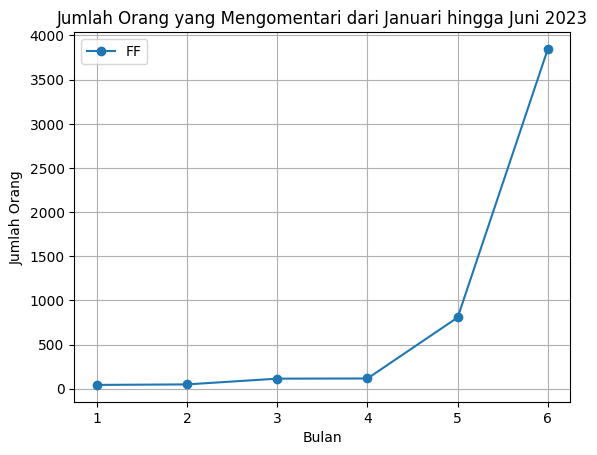

In [14]:
def count_commenters(df,month):
    filtered_df = df[(df["Bulan"] == month)]
    num_commenters = filtered_df["Username"].nunique()
    return num_commenters

# Menghitung jumlah orang yang mengomentari dari bulan Januari hingga Juni 2023 untuk masing-masing dataset
months = range(1, 7)
num_commenters1 = []

for month in months:
    num_commenters1.append(count_commenters(df, month)) 

# Membuat subplot dan plot masing-masing dataset
fig, ax = plt.subplots()

ax.plot(months, num_commenters1, marker='o', label='FF')

# Konfigurasi tambahan pada plot
ax.set_xlabel('Bulan')
ax.set_ylabel('Jumlah Orang')
ax.set_title('Jumlah Orang yang Mengomentari dari Januari hingga Juni 2023')
ax.set_xticks(months)
ax.grid(True)

# Menampilkan legenda
ax.legend()

# Menampilkan plot
plt.show()


terdapat kenaikan signifikan pada bulan mei-juni 2023

### 2. Melihat banyak user pada bulan tertentu yang memberikan rating

In [15]:
from datetime import datetime
import calendar

In [16]:
import pandas as pd
import calendar

# Filter dataset untuk tahun 2023 dan bulan 1-6
filtered_data = df[(df['Bulan'].between(1, 6))].copy()

# Mengubah nilai bulan menjadi nama bulan dalam urutan yang benar
filtered_data['Bulan'] = filtered_data['Bulan'].apply(lambda x: calendar.month_name[x])
filtered_data['Bulan'] = pd.Categorical(filtered_data['Bulan'], categories=calendar.month_name[1:7], ordered=True)

# Membuat tabel frekuensi rating berdasarkan bulan
rating_counts = filtered_data.groupby('Bulan')['Rating'].value_counts().unstack().fillna(0)

# Mengubah label rating
rating_counts.columns = ['Rating ' + str(rating) for rating in rating_counts.columns]

# Mereset indeks
rating_counts = rating_counts.reset_index()

df_FF = pd.DataFrame(rating_counts)
# Menampilkan hasil
print(df_FF)


      Bulan  Rating 1  Rating 2  Rating 3  Rating 4  Rating 5
0   January        19         6         1         6        11
1  February        13        10         7         9        10
2     March        30        26        22        15        21
3     April        49        18        19        14        16
4       May       237       122       153       109       188
5      June      1966       578       459       265       601


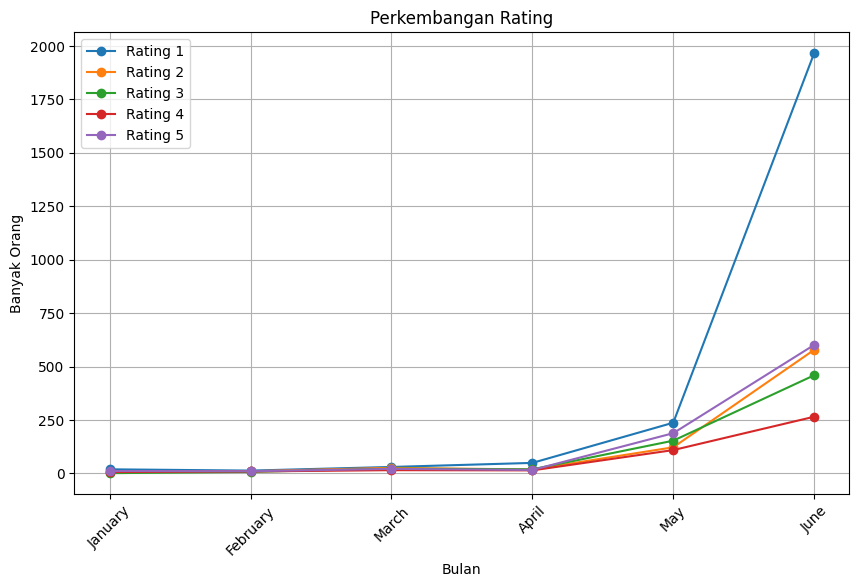

In [17]:
# Mengurutkan indeks DataFrame berdasarkan bulan
df_FF = df_FF.sort_values(by='Bulan')

plt.figure(figsize=(10, 6))  # Mengatur ukuran frame

# Memplot diagram garis untuk setiap kolom rating
for column in df_FF.columns[1:]:
    plt.plot(df_FF['Bulan'], df_FF[column], marker='o', label=column)

plt.xlabel('Bulan')
plt.ylabel('Banyak Orang')
plt.title('Perkembangan Rating')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()


ternyata banyak user yang memberikan bintang 1 pada bulai mei-juni 2023

### 3. Melihat korelasi dari setiap kolom 

C:\Users\Asani\AppData\Local\Temp\ipykernel_6576\2925864054.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_FF.corr()


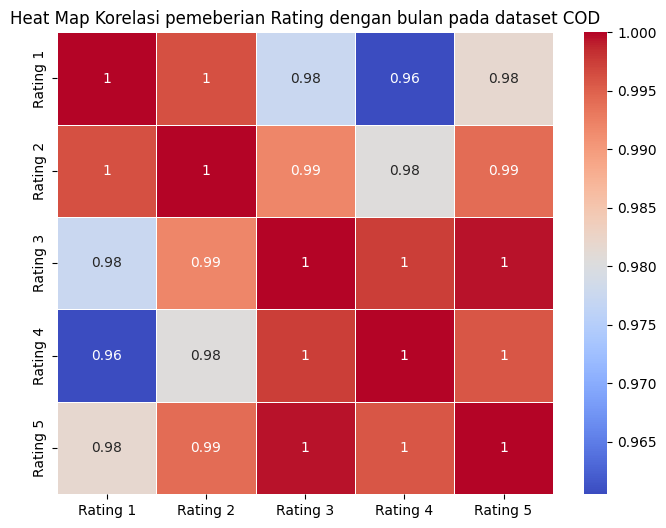

In [18]:
# Menghitung korelasi antara kolom-kolom pada DataFrame rating_counts
correlation_matrix = df_FF.corr()

# Membuat heat map dari matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heat Map Korelasi pemeberian Rating dengan bulan pada dataset COD')
plt.show()

# Analisis data berdasarkan Komentar

### 1. Melihat jumlah kata pada kolom komentar

In [19]:

df["Jumlah_Kata"] = df["Komentar"].apply(lambda x: len(x.split()))

df

,Username,Bulan,Komentar,Rating,Jumlah_Kata
0,Phyta Rayhn,6,tolong permainan ringan lagi karena kasihan k...,1,29
1,Komang Edirestawan,6,baca info permainan saja terus padahal sinyal ...,2,20
2,Sofyan Uchup,6,sudah update sinyal kenapa tidak stabil tolon...,2,18
3,Nasywan Farrel,6,update terus cacat tidak urus jaringan saat ma...,5,19
4,Baim Aja,6,tidak bisa berguna update terus kita kalau mai...,1,29
...,...,...,...,...,...
4995,gusto temaluru,1,tolong perbaiki lagi tentang cacat luar zona ...,1,49
4996,ANM Gmg,1,untuk pihak garena free fire indonesia tolong ...,5,55
4997,Adam,1,jangan terlalu ada banyak alasan pada permaina...,5,35
4998,Ferry Martua Sitorus,1,mau kasih tahu buat garena free fire update se...,4,55


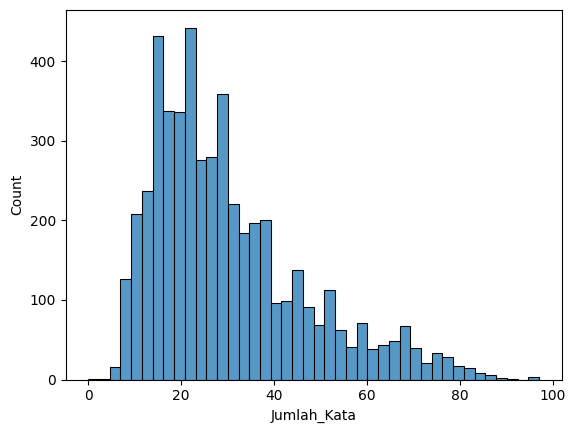

In [20]:
sns.histplot(data=df, x="Jumlah_Kata")
plt.show()

In [21]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

target_months = [6]  # Bulan Mei dan Juni

for month in target_months:
    # Menggabungkan semua komentar dari bulan yang ditentukan menjadi satu teks
    all_comments = ' '.join([word for comment, m in zip(df['Komentar'].tolist(), df['Bulan'].tolist()) if m == month for word in word_tokenize(comment)])

    # Tokenisasi kata
    tokens = word_tokenize(all_comments)

    # Menghitung frekuensi kata
    fdist = FreqDist(tokens)

    # Mengambil 10 kata dengan frekuensi tertinggi
    most_common_words = fdist.most_common(10)

    print(f"10 kata yang paling banyak disebutkan pada aplikasi Free Fire untuk bulan {month}:")
    for word, frequency in most_common_words:
        print(word, ":", frequency)
    print()


10 kata yang paling banyak disebutkan pada aplikasi Free Fire untuk bulan 6:
tidak : 2854
permainan : 2248
semakin : 2121
main : 2095
yang : 1995
cacat : 1937
tolong : 1926
sudah : 1769
update : 1703
perbaiki : 1589



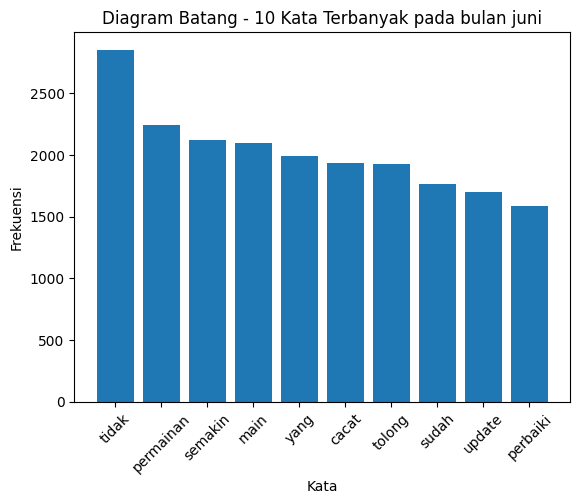

In [22]:
# Data kata-kata dan frekuensinya
words = [word for word, _ in most_common_words]
frequencies = [frequency for _, frequency in most_common_words]

# Membuat diagram batang
plt.bar(words, frequencies)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Diagram Batang - 10 Kata Terbanyak pada bulan juni')
plt.xticks(rotation=45)
plt.show()

In [23]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

target_months = [5]  # Bulan Mei dan Juni

for month in target_months:
    # Menggabungkan semua komentar dari bulan yang ditentukan menjadi satu teks
    all_comments = ' '.join([word for comment, m in zip(df['Komentar'].tolist(), df['Bulan'].tolist()) if m == month for word in word_tokenize(comment)])

    # Tokenisasi kata
    tokens = word_tokenize(all_comments)

    # Menghitung frekuensi kata
    fdist = FreqDist(tokens)

    # Mengambil 10 kata dengan frekuensi tertinggi
    most_common_words = fdist.most_common(10)

    print(f"10 kata yang paling banyak disebutkan pada aplikasi Free Fire untuk bulan {month}:")
    for word, frequency in most_common_words:
        print(word, ":", frequency)
    print()

10 kata yang paling banyak disebutkan pada aplikasi Free Fire untuk bulan 5:
yang : 643
tidak : 582
permainan : 545
main : 481
semakin : 433
dan : 415
sudah : 411
tolong : 403
cacat : 396
update : 388



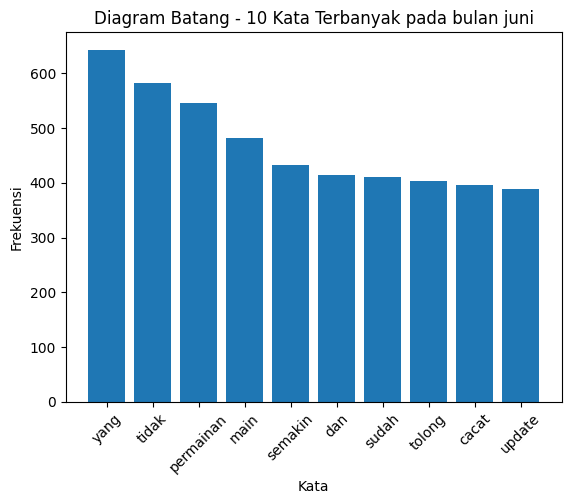

In [24]:
# Data kata-kata dan frekuensinya
words = [word for word, _ in most_common_words]
frequencies = [frequency for _, frequency in most_common_words]

# Membuat diagram batang
plt.bar(words, frequencies)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Diagram Batang - 10 Kata Terbanyak pada bulan juni')
plt.xticks(rotation=45)
plt.show()

In [25]:
import nltk
from nltk import bigrams, word_tokenize
from nltk.probability import FreqDist
import pandas as pd
import matplotlib.pyplot as plt

# Mengambil kolom komentar
komentar = df['Komentar']

# Tokenisasi kata-kata dalam setiap komentar
token_komentar = komentar.apply(lambda x: word_tokenize(str(x)))

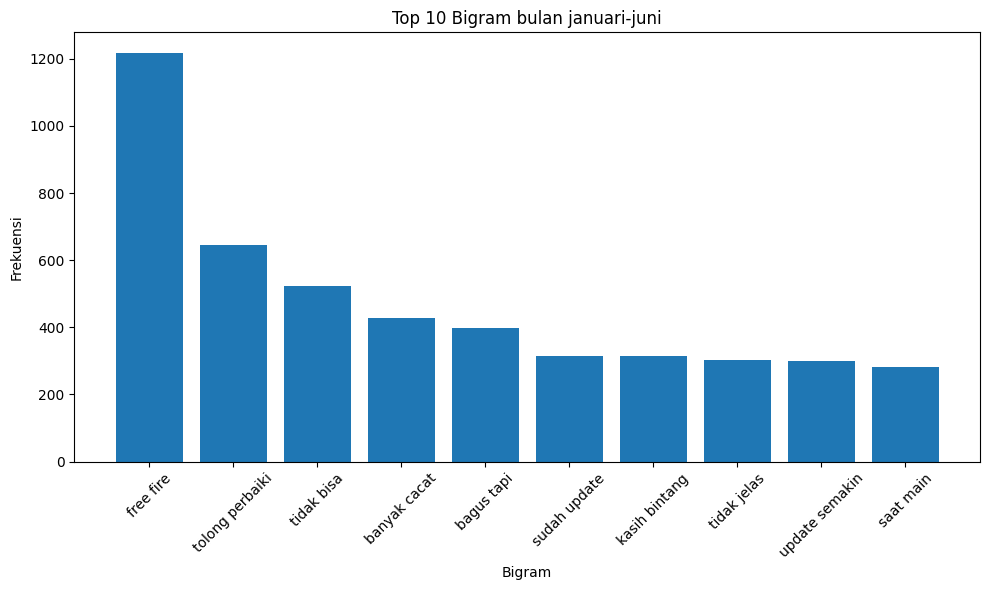

In [27]:
# Mendapatkan bigram untuk setiap komentar
bigram_komentar = token_komentar.apply(lambda x: list(bigrams(x)))

# Menggabungkan semua bigram dari seluruh komentar
all_bigrams = [bg for sublist in bigram_komentar for bg in sublist]

# Menghitung frekuensi kemunculan setiap bigram
freq_dist = FreqDist(all_bigrams)

# Mengurutkan bigram berdasarkan frekuensi kemunculan
sorted_bigrams = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)

# Mengambil 10 bigram teratas
top_10_bigrams = sorted_bigrams[:10]

# Membuat list label dan frekuensi dari 10 bigram teratas
labels = [f"{bg[0][0]} {bg[0][1]}" for bg in top_10_bigrams]
frequencies = [bg[1] for bg in top_10_bigrams]

# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(labels, frequencies)
plt.xticks(rotation=45)
plt.xlabel('Bigram')
plt.ylabel('Frekuensi')
plt.title('Top 10 Bigram bulan januari-juni')
plt.tight_layout()
plt.show()

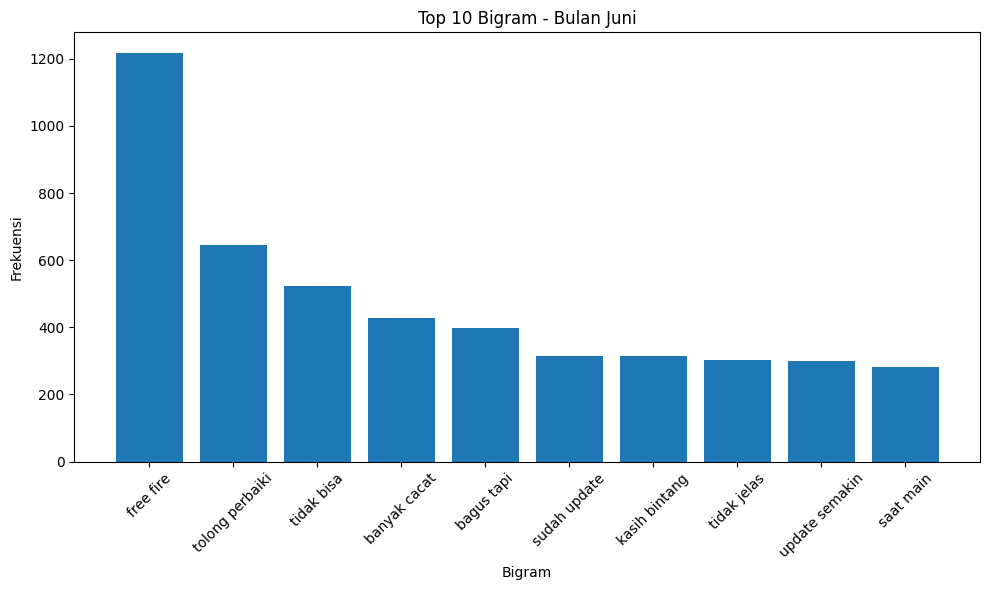

In [28]:
# Filter data hanya untuk bulan Juni
df_june = df[df['Bulan'] == 6]

# Tokenisasi kata-kata dalam setiap komentar
token_komentar = df_june['Komentar'].apply(lambda x: word_tokenize(str(x)))

# Mendapatkan bigram untuk setiap komentar
bigram_komentar = token_komentar.apply(lambda x: list(bigrams(x)))

# Menggabungkan semua bigram dari seluruh komentar
all_bigrams = [bg for sublist in bigram_komentar for bg in sublist]

# Menghitung frekuensi kemunculan setiap bigram
freq_dist = FreqDist(all_bigrams)

# Mengurutkan bigram berdasarkan frekuensi kemunculan
sorted_bigrams = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)

# Mengambil 10 bigram teratas
top_10_bigrams = sorted_bigrams[:10]

# Membuat list label dan frekuensi dari 10 bigram teratas
labels = [f"{bg[0][0]} {bg[0][1]}" for bg in top_10_bigrams]
frequencies = [bg[1] for bg in top_10_bigrams]

# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(labels, frequencies)
plt.xticks(rotation=45)
plt.xlabel('Bigram')
plt.ylabel('Frekuensi')
plt.title('Top 10 Bigram - Bulan Juni')
plt.tight_layout()
plt.show()

Kesimpulan :
dari hasil analisis komentar menggunakan N-gram terdapat beberapa yang harus diperbaiki
1. terdapat banyak cacat (BUG) pada update mei-juni dimana masalah jaringan harus di segera diperbaiki
2. update yang dilakukan pada Mei-juni masih banyak error bagi pemain.

##  Membuat Machine learning menggunakan Model LSTM

In [38]:
# Menentukan ambang batas untuk mengkategorikan sentimen
threshold_positif = 3
threshold_negatif = 2

# Menerapkan analisis sentimen berdasarkan skor
df['Sentimen'] = df['Rating'].apply(lambda x: 'Positif' if x >= threshold_positif else 'Negatif')

# Menyimpan hasil analisis sentimen ke dalam data frame
df_FF = df[['Komentar', 'Sentimen']]

df_FF

,Komentar,Sentimen
0,tolong permainan ringan lagi karena kasihan k...,Negatif
1,baca info permainan saja terus padahal sinyal ...,Negatif
2,sudah update sinyal kenapa tidak stabil tolon...,Negatif
3,update terus cacat tidak urus jaringan saat ma...,Positif
4,tidak bisa berguna update terus kita kalau mai...,Negatif
...,...,...
4995,tolong perbaiki lagi tentang cacat luar zona ...,Negatif
4996,untuk pihak garena free fire indonesia tolong ...,Positif
4997,jangan terlalu ada banyak alasan pada permaina...,Positif
4998,mau kasih tahu buat garena free fire update se...,Positif


In [90]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Data teks dan label
X = df_FF['Komentar']
y = df_FF['Sentimen']

# Tokenisasi dan pengkodean teks
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X_sequences = tokenizer.texts_to_sequences(X)
max_sequence_length = max(len(seq) for seq in X_sequences)
X_sequences = pad_sequences(X_sequences, maxlen=max_sequence_length)

# Pengkodean label
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Oversampling dengan SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_sequences, y_encoded)

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Membangun model LSTM
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_sequence_length))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Kompilasi model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Latih model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluasi model pada data uji
loss, accuracy = model.evaluate(X_test, y_test)
print("Akurasi pada data uji:", accuracy)


Epoch 1/10
123/123 [==============================] - 14s 91ms/step - loss: 0.6418 - accuracy: 0.6218 - val_loss: 0.6161 - val_accuracy: 0.6565
Epoch 2/10
123/123 [==============================] - 11s 89ms/step - loss: 0.5207 - accuracy: 0.7496 - val_loss: 0.6130 - val_accuracy: 0.6636
Epoch 3/10
123/123 [==============================] - 11s 91ms/step - loss: 0.4062 - accuracy: 0.8183 - val_loss: 0.6872 - val_accuracy: 0.6626
Epoch 4/10
123/123 [==============================] - 12s 98ms/step - loss: 0.2889 - accuracy: 0.8775 - val_loss: 0.8064 - val_accuracy: 0.6362
Epoch 5/10
123/123 [==============================] - 12s 98ms/step - loss: 0.2146 - accuracy: 0.9179 - val_loss: 0.8909 - val_accuracy: 0.6372
Epoch 6/10
123/123 [==============================] - 12s 98ms/step - loss: 0.1615 - accuracy: 0.9382 - val_loss: 1.1002 - val_accuracy: 0.6484
Epoch 7/10
123/123 [==============================] - 12s 102ms/step - loss: 0.1143 - accuracy: 0.9611 - val_loss: 1.1546 - val_accuracy